# Troubleshooting Cl(mnu) and P(mnu)

In [19]:
import crosspower as cp # branch master
#import FisherCl as fcl
#from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [20]:
# grab some code from FisherCl
cosParams = {
    'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
    'cosmomc_theta'           : 1.04087e-2,
    'ombh2' : 0.02226,
    'omch2' : 0.1193,
    'omk'   : 0,
    'tau'   : 0.063,

    'As'    : 2.130e-9,
    'ns'    : 0.9653,
    'r'     : 0,
    'kPivot': 0.05,

    'w'     : -1.0, # DARK ENERGY!!!

    # if fiducial mnu is changed, need to adjust omch2 as well
    'mnu'   : 0.06, # (eV)
    #'mnu'   : 0.058, # Lloyd suggested this value for fiducial; adjust omch2 if I do use it
    'nnu'   : 3.046,
    'standard_neutrino_neff'  : 3.046,
    'num_massive_neutrinos'   : 1,
    
    # modifications from FisherCl follow:
    'AccuracyBoost'           : 2,
    'neutrino_hierarchy'      : 'degenerate'}  #'normal'}



paramList = ['ombh2','omch2','cosmomc_theta','As','ns','tau','mnu','w']
deltaP = [0.0008,0.0030,0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05] #mnu one in eV

# get nominal cases for linear and nonlinear
# NOTE: FOR COMPARISON WITH B'S PLOTS USE HUNITS FLAG IN CROSSPOWER
myPkNomLin   = cp.MatterPower(hunits=True,nonlinear=False,**cosParams)
myPkNomNLn   = cp.MatterPower(hunits=True,nonlinear=True, **cosParams)

print 'done'

neutrino_hierarchy =  degenerate
zs.size:  9998


neutrino_hierarchy =  degenerate
zs.size:  9998
done


In [21]:
print myPkNomLin.AccuracyBoost

2


In [22]:
# get a set of matter power spectra for creating numerical derivatives.
# copy some code from FisherCl.py

# select parameter number of interest
thetaNum = 5 #tau
#thetaNum = 6 #mnu

# get copies of cosParams and make modifications
cosParamsUpper = cosParams.copy()
cosParamsLower = cosParams.copy()
cosParamsUpper[paramList[thetaNum]] += deltaP[thetaNum]
cosParamsLower[paramList[thetaNum]] -= deltaP[thetaNum]

verbose = True
if verbose:
    print 'parameter to vary: ',paramList[thetaNum]
    print 'upper parameters: '
    print cosParamsUpper
    print 'nominal parameters: '
    print cosParams
    print 'lower parameters: '
    print cosParamsLower

#mnuNom   = 0.06 # eV
#mnuStep  = 0.02
#mnuPlus  = mnuNom+mnuStep
#mnuMinus = mnuNom-mnuStep

myPkPlusLin  = cp.MatterPower(hunits=True,nonlinear=False,**cosParamsUpper)
myPkMinusLin = cp.MatterPower(hunits=True,nonlinear=False,**cosParamsLower)

myPkPlusNLn   = cp.MatterPower(hunits=True,nonlinear=True,**cosParamsUpper)
myPkMinusNLn  = cp.MatterPower(hunits=True,nonlinear=True,**cosParamsLower)

print 'done'

parameter to vary:  tau
upper parameters: 
{'tau': 0.083, 'omk': 0, 'mnu': 0.06, 'standard_neutrino_neff': 3.046, 'omch2': 0.1193, 'num_massive_neutrinos': 1, 'nnu': 3.046, 'cosmomc_theta': 0.0104087, 'kPivot': 0.05, 'AccuracyBoost': 2, 'H0': None, 'neutrino_hierarchy': 'degenerate', 'As': 2.13e-09, 'r': 0, 'w': -1.0, 'ns': 0.9653, 'ombh2': 0.02226}
nominal parameters: 
{'cosmomc_theta': 0.0104087, 'num_massive_neutrinos': 1, 'tau': 0.063, 'omk': 0, 'AccuracyBoost': 2, 'H0': None, 'kPivot': 0.05, 'mnu': 0.06, 'standard_neutrino_neff': 3.046, 'neutrino_hierarchy': 'degenerate', 'As': 2.13e-09, 'r': 0, 'omch2': 0.1193, 'w': -1.0, 'nnu': 3.046, 'ns': 0.9653, 'ombh2': 0.02226}
lower parameters: 
{'tau': 0.043, 'omk': 0, 'mnu': 0.06, 'standard_neutrino_neff': 3.046, 'omch2': 0.1193, 'num_massive_neutrinos': 1, 'nnu': 3.046, 'cosmomc_theta': 0.0104087, 'kPivot': 0.05, 'AccuracyBoost': 2, 'H0': None, 'neutrino_hierarchy': 'degenerate', 'As': 2.13e-09, 'r': 0, 'w': -1.0, 'ns': 0.9653, 'ombh2':

neutrino_hierarchy =  degenerate
zs.size:  9998


neutrino_hierarchy =  degenerate
zs.size:  9998


neutrino_hierarchy =  degenerate
zs.size:  9998
done


In [23]:
print 'check H0 values:'
print myPkPlusLin.H0
print myPkPlusNLn.H0

print myPkNomLin.H0
print myPkNomNLn.H0

print myPkMinusLin.H0
print myPkMinusNLn.H0

check H0 values:
0.000225139594645
0.000225139594645
0.000225139594645
0.000225139594645
0.000225139594645
0.000225139594645


In [24]:
# get interpolated values needed for log. deriv.s
# pick kArray, zSet
numKVals = 1000
kSpectrum = np.logspace(-4,0.0,numKVals)
myZs = np.array([0,1,2,4])
numZs = 4

# big array to hold results
Pk = np.empty([3,2,numZs,numKVals]) #(Plus/Nom/Minus, Lin/NL, zNum, kNum)

for zi,myZ in enumerate(myZs):
    Pk[0,0,zi] = myPkPlusLin.PK.P(myZ,kSpectrum)
    Pk[0,1,zi] = myPkPlusNLn.PK.P(myZ,kSpectrum)
    
    Pk[1,0,zi] = myPkNomLin.PK.P(myZ,kSpectrum)
    Pk[1,1,zi] = myPkNomNLn.PK.P(myZ,kSpectrum)
    
    Pk[2,0,zi] = myPkMinusLin.PK.P(myZ,kSpectrum)
    Pk[2,1,zi] = myPkMinusNLn.PK.P(myZ,kSpectrum)
    
print 'done interpolating Pk.s'

done interpolating Pk.s


In [25]:
# now get logarithmic derivs: d ln P(z,k) / d mnu
#mnuStep  = 0.02 # defined above
dTheta = deltaP[thetaNum]
dPdTheta = (Pk[0]-Pk[2])/(2*dTheta)
dlnPdTheta = dPdTheta/Pk[1]
print dPdTheta.shape,dlnPdTheta.shape

(2, 4, 1000) (2, 4, 1000)


In [26]:
# convert k to k/h
#kSpectrumPerHLin = kSpectrum/(myPkNomLin.H0*2.99792e5/100)
#kSpectrumPerHNL  = kSpectrum/(myPkNomNLn.H0*2.99792e5/100)
#kSpecPerH = [kSpectrumPerHLin,kSpectrumPerHNL]
# don't need to convert dlnPdTheta, since units cancelled.

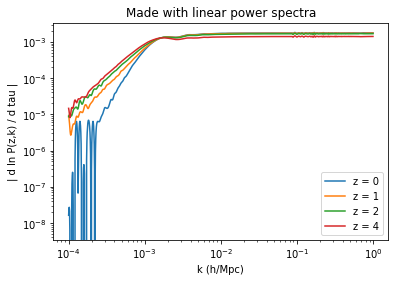

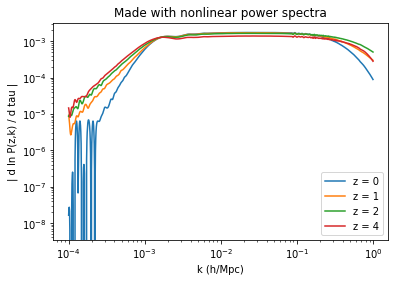

In [28]:
linNames = ['linear','nonlinear']
for lInd in range(2): #lin,nl
    #kSpectrum = kSpecPerH[lInd]
    for zInd in range(4):
        plt.loglog(kSpectrum,-1*dlnPdTheta[lInd,zInd],label='z = {0}'.format(myZs[zInd]))
    plt.title('Made with '+linNames[lInd]+' power spectra')
    plt.xlabel('k (h/Mpc)')
    plt.ylabel('| d ln P(z,k) / d {0} |'.format(paramList[thetaNum]))
    #plt.ylim([4e-1,1e0]) # for mnu
    #plt.ylim([1e-3,1e0])
    plt.legend()
    plt.show()

# check derivatives of P(k)

In [35]:
# for comparison of P(k), see notebook: Exploring Byeonghee_s .dat files

In [36]:
# load Byeonghee's dP(k)/dmnu files
dPkdMnu_Lin = np.loadtxt('Byeonghee_dat3/dlnP_dmnu_linear.dat')
dPkdMnu_NLn = np.loadtxt('Byeonghee_dat3/dlnP_dmnu_nonlinear.dat')
print dPkdMnu_Lin.shape
print dPkdMnu_NLn.shape

(1000, 5)
(1000, 5)


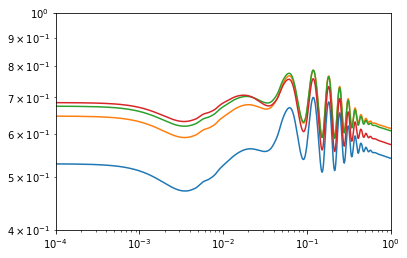

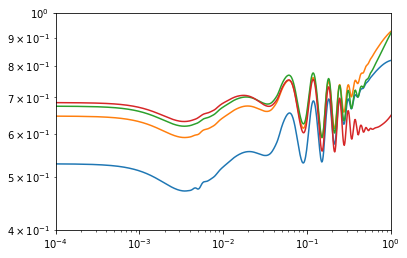

In [37]:
# try plotting with first variable as k
for zNum in range(4):
    plt.loglog(dPkdMnu_Lin[:,0],-1*dPkdMnu_Lin[:,zNum+1])
    plt.xlim([1e-4,1e0])
    plt.ylim([4e-1,1e0])
plt.show()

for zNum in range(4):
    plt.loglog(dPkdMnu_NLn[:,0],-1*dPkdMnu_NLn[:,zNum+1])
    plt.xlim([1e-4,1e0])
    plt.ylim([4e-1,1e0])
plt.show()

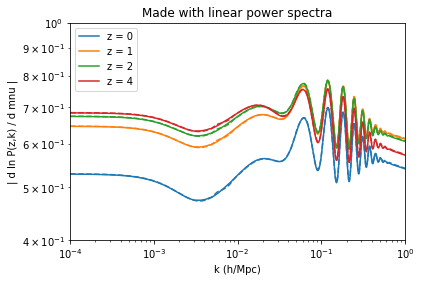

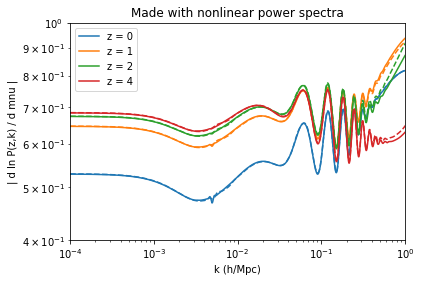

In [38]:
# plot together
dPkdMnu_B = np.array([dPkdMnu_Lin,dPkdMnu_NLn])
#print dPkdMnu_B.shape

linNames = ['linear','nonlinear']
for lInd in range(2): #lin,nln
    #kSpectrum = kSpecPerH[lInd]
    for zInd in range(4):
        plt.loglog(kSpectrum,-1*dlnPdTheta[lInd,zInd],label='z = {0}'.format(myZs[zInd]),color='C{0}'.format(zInd))
        plt.loglog(dPkdMnu_B[lInd,:,0],-1*dPkdMnu_B[lInd,:,zInd+1],linestyle='--',color='C{0}'.format(zInd))
    plt.title('Made with '+linNames[lInd]+' power spectra')
    plt.xlabel('k (h/Mpc)')
    plt.ylabel('| d ln P(z,k) / d {0} |'.format(paramList[thetaNum]))
    plt.xlim([1e-4,1e0])
    plt.ylim([4e-1,1e0])
    plt.legend()
    plt.show()